In [1]:
import os,sys,shutil
import numpy as np
import time
import matplotlib.pyplot as plt
from mpm_rect import mpm_rect
sys.path.append(os.getcwd()+'/build')
import MPM_2D

In [2]:
#Defining the Spring
Emod = 1e5; Density = 1500; Poisson = 0.0
MPV = mpm_rect([0.02,0.8], [0.02,0.2], [1,10],1 )
Spring = MPM_2D.MPM_Solid(Emod, Density, Poisson, MPV)
Spring.MPC()[:,18] = -9.81

NoMP = Spring.NoMP
#print(Spring.MPC())

In [3]:
#Defining the grid
x_0 = 0; y_0 = 0;                               #Origin of X and Y Axis
lx = 0.06; ly = 1.0;                            #Length of grid in X and Y direction
nx = 3; ny = 21;                                #Number of cells in X and Y direction

Grid = MPM_2D.MPM_Grid(L=[lx, ly], N=[nx, ny], O=[x_0, y_0])
NoNodes = Grid.NoNodes

In [4]:
SpringSolver = MPM_2D.MPM_Solver()                                          #Defining solver
SpringSolver.addBC(lambda X: True if (X[1] >= 1.0) else False, vy=0.0)      #Boundary conditions

#Running through time steps
dt = 1e-4
T  = 2.0
NoS = int(T/dt)
noMicroSteps = int(1)                    #Incremental time step for solver
noMacroSteps = int(NoS/noMicroSteps)        #Number of vtk files

recordx = np.zeros(noMacroSteps)
recordt = np.zeros(noMacroSteps)
u = np.zeros(noMacroSteps)
u_0 = Spring.MPC()[0][1]
Time = 0
start_time = time.time()
for step in range (noMacroSteps):
    SpringSolver.Solve(Grid, [Spring], noMicroSteps, dt)
    u[step] = u_0 - Spring.MPC()[0][1]
    Time = Time + dt*noMicroSteps
    recordx[step] = Spring.MPC()[0][1]
    recordt[step] = Time;
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5683262348175049 seconds ---


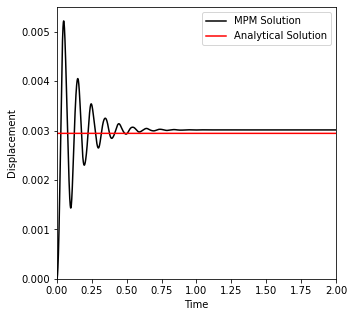

In [5]:
#plot
u_atl = np.ones(noMacroSteps) * 2.943e-3
u_mpm = np.ones(noMacroSteps) * ((np.sum(u))/NoS)
fig, ax = plt.subplots(1, 1, figsize = (5, 5))                                  #creating axis
ax.set_xlim(0,T); ax.set_ylim(0,0.0055) 
ax.set_xlabel('Time')
ax.set_ylabel('Displacement')   
#plt.plot(recordt,recordx)
ax.plot(recordt,u, 'black', label = "MPM Solution")
ax.plot(recordt,u_atl, 'red', label = "Analytical Solution")
ax.legend(loc="upper right")
#plt.plot(recordt,u_mpm, 'green')
fig.savefig("Spring_Displacement", dpi=400, bbox_inches="tight")

In [6]:
(np.sum(u))/NoS

0.0030050284855382965